# Exercises 27-11-2023

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

## Exercise 9.1
Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list.

In [ ]:
def expon_random(tau,N):
    if tau == 0: return np.zeros(N)
    return -tau*np.log(1-np.random.rand(N))

rand_expon_numbers = expon_random(5,10)
print(rand_expon_numbers)

[ 7.42976884  5.44152884  1.34176726 18.41186729  0.70896837  7.34715227
  2.80138634 10.59066298  0.06505936  7.96945892]


## Exercise 9.2
Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen.

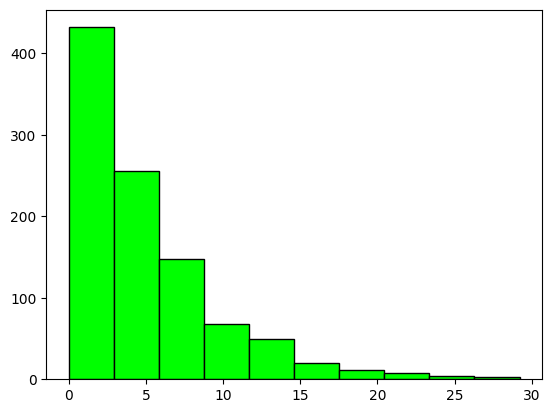

In [ ]:
def display_exp_hist(tau,N):
  X = expon_random(tau,N)
  plt.hist(X,color='lime',edgecolor='black')
  plt.show()

display_exp_hist(5,1000)


## Exercise 9.3
Write a program that plots the exponential probability distribution with a fixed parameter t0.

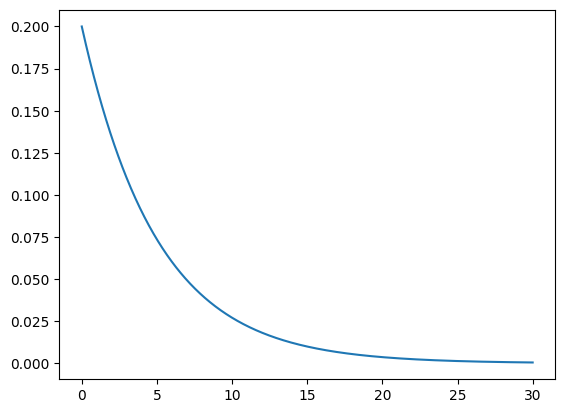

In [ ]:
t0 = 5
X = np.linspace(0,t0*6,1000)
Y = 1/t0 * np.exp(-X/t0)
plt.plot(X,Y)
plt.show()


## Exercise 9.4
Write a function likelihood that calculates the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1.

How does the result depend on the number of events in the sample?

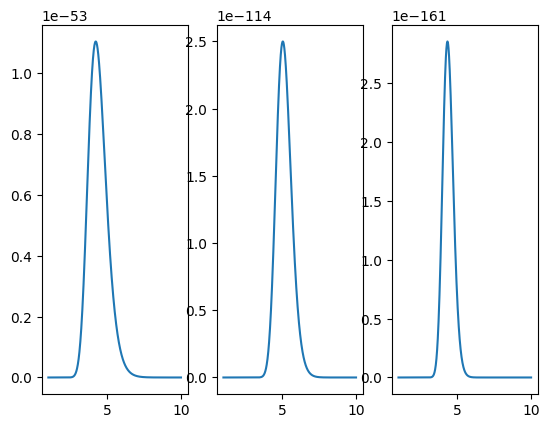

In [154]:
def likehood(f,X,tau):
  return np.prod(f(X,tau))

def exponential_pdf(X,tau):
  return 1/tau * np.exp(-X/tau)

tau = 5
mu = np.linspace(1,10,1000) # genero dei mu attorno ai quali testare la likehood

N = np.linspace(50,150,3,dtype=np.int64)
fig, ax = plt.subplots(1, len(N))
# N = np.logspace(1,4,5,dtype=np.int64)
# N = np.arange(10,15)
for col,i in enumerate(N):
  X = expon_random(tau,i) # genero una collezione dati di i misurazioni
  L = np.array([likehood(exponential_pdf,X,t) for t in mu])
  # max = np.max(L)
  #L = L - max
  ax[col].plot(mu,L,label=f'N={i}')
  #ax[col].set_xlim(0,10)

plt.show()

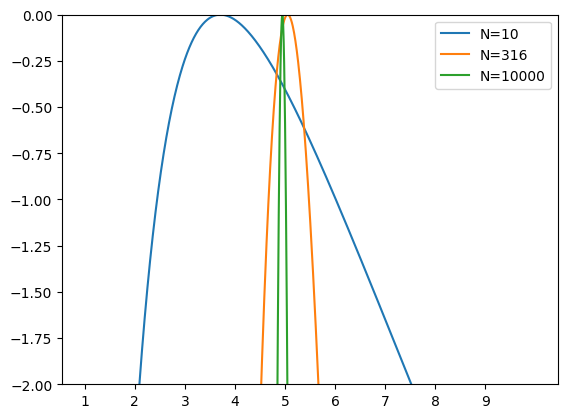

In [185]:
def likehood(f,X,tau):
  return np.prod(f(X,tau))

def loglikehood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

def exponential_pdf(X,tau):
  return 1/tau * np.exp(-X/tau)

tau = 5
mu = np.linspace(1,10,1000) # genero dei mu attorno ai quali testare la likehood

# N = np.linspace(50,150,3,dtype=np.int64)
N = np.logspace(1,4,3,dtype=np.int64)
# N = np.arange(10,15)
for i in N:
  X = expon_random(tau,i) # genero una collezione dati di i misurazioni
  L = np.array([loglikehood(exponential_pdf,X,t) for t in mu])
  max = np.max(L)
  L = L - max
  plt.plot(mu,L,label=f'N={i}')
  #ax[col].set_xlim(0,10)

plt.ylim(-2,0)
plt.xticks(np.arange(1,10))
plt.legend()
plt.show()

## Exercise 9.4

Write a function loglikelihood that calculates the logarithm of the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1. Remember that the logarithm of the likelihood is defined only when the likelihood is strictly positive.



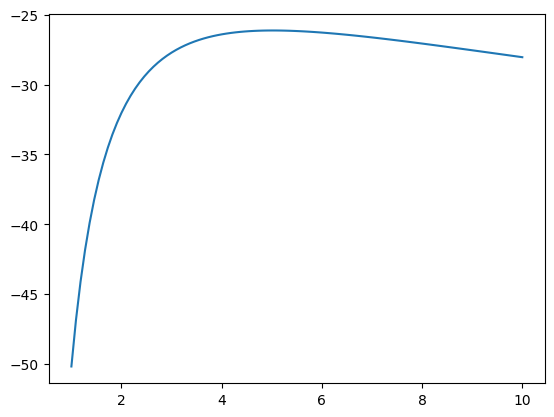

In [126]:
def loglikehood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

tau = 5
X = expon_random(tau,10)
R = np.linspace(1,10,100)
L = np.array([loglikehood(exponential_pdf,X,t) for t in R])

plt.plot(R,L)
plt.show()

## Exercise 8.6
Study the behavior of the shape of the log-likelihood as a function of the number of events comprising the generated sample.

<ipython-input-70-dfa4b8285833>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  toys = np.array([expon_random(tau,i) for i in X])


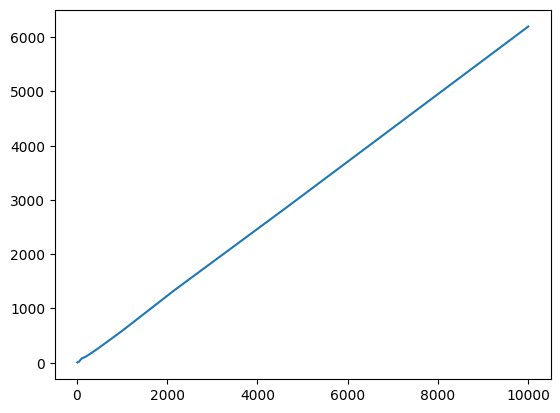

In [ ]:
tau = 0.2 # any tau is allowes, an higher tau shift over the line
X = np.logspace(1,4,10, dtype=np.int64)
toys = np.array([expon_random(tau,i) for i in X])
Y = np.array([loglikehood(exponential_pdf,i,tau) for i in toys])
plt.plot(X,Y)
plt.show()